#### Setup Environment and Import Libraries

In [ ]:
# Setup Environment and Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline

In [ ]:
#Load the Dataset
# Load dataset into pandas dataframe
customer_churn_df = pd.read_csv(r'C:\Users\micha\OneDrive\Desktop\Customer_Churn_Prediction_Project\Customer_Churn_Prediction_Project\dataset\raw_data\WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [ ]:
# Display first few rows
customer_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Initial Data Exploration
# Shape and info
print("Shape of dataset:", customer_churn_df.shape)
customer_churn_df.info()

Shape of dataset: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBill

In [ ]:
# Check for missing values
print(customer_churn_df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Describe numerical columns
customer_churn_df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


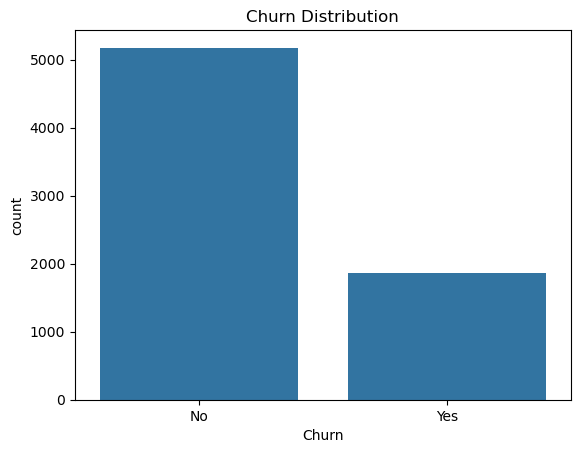

Percentage of churn:
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [ ]:
# Churn counts
sns.countplot(x='Churn', data=customer_churn_df)
plt.title('Churn Distribution')
plt.show()

# Percentage of churn
churn_percentage = customer_churn_df['Churn'].value_counts(normalize=True) * 100
print("Percentage of churn:\n", churn_percentage)


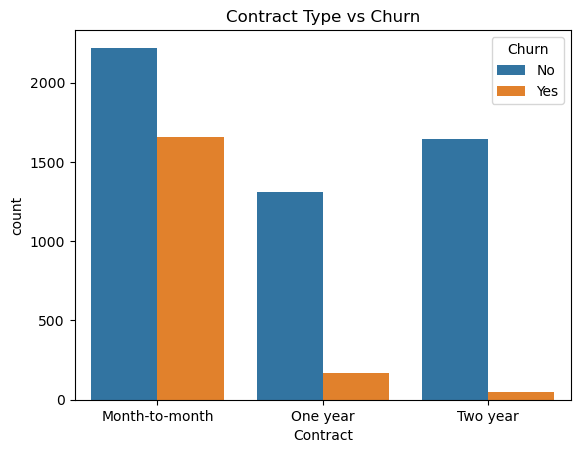

In [ ]:
# Exploring Categorical Features: Example: Contract Type vs Churn
sns.countplot(x='Contract', hue='Churn', data=customer_churn_df)
plt.title('Contract Type vs Churn')
plt.show()

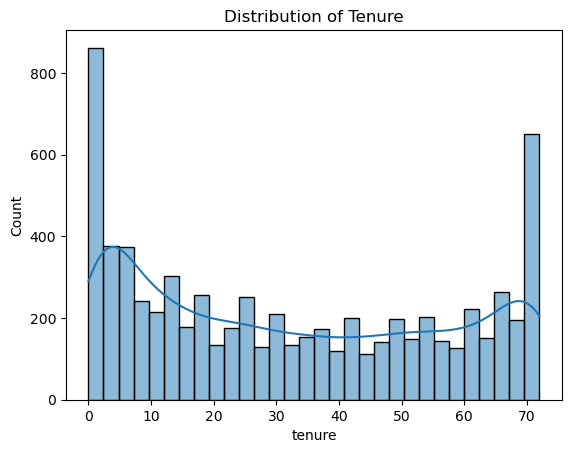

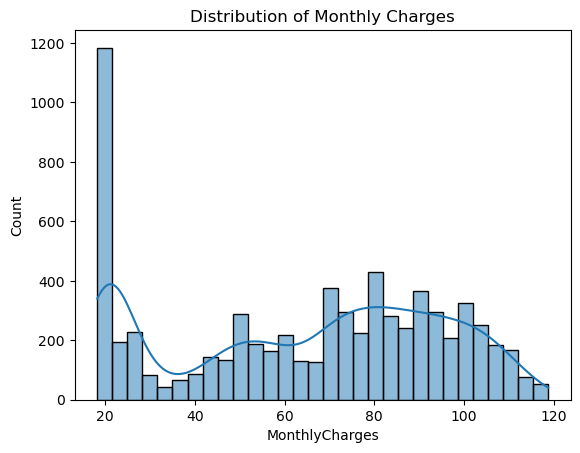

In [ ]:
# Histogram for tenure
sns.histplot(customer_churn_df['tenure'], kde=True, bins=30)
plt.title('Distribution of Tenure')
plt.show()

# Histogram for MonthlyCharges
sns.histplot(customer_churn_df['MonthlyCharges'], kde=True, bins=30)
plt.title('Distribution of Monthly Charges')
plt.show()


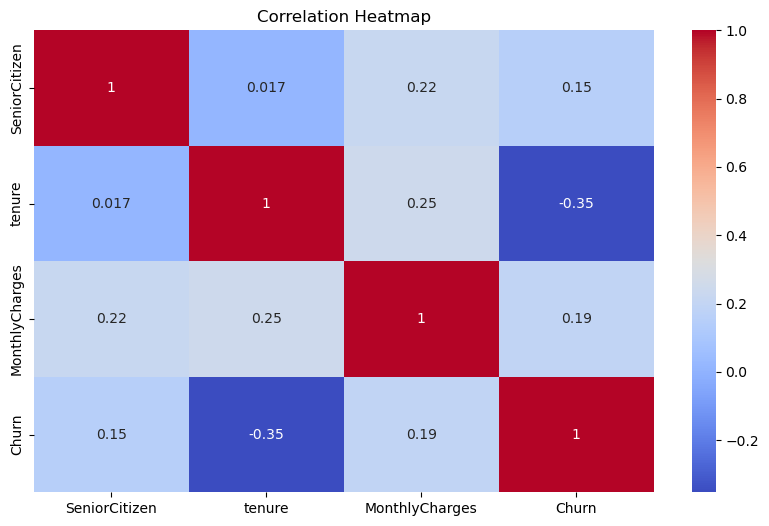

In [ ]:
# Encode churn for correlation analysis
df_encoded = customer_churn_df.copy()
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes':1, 'No':0})

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Check for unexpected spaces in categorical features
for col in customer_churn_df.select_dtypes(include='object').columns:
    print(f"{col} unique values: {customer_churn_df[col].unique()}\n")

customerID unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender unique values: ['Female' 'Male']

Partner unique values: ['Yes' 'No']

Dependents unique values: ['No' 'Yes']

PhoneService unique values: ['No' 'Yes']

MultipleLines unique values: ['No phone service' 'No' 'Yes']

InternetService unique values: ['DSL' 'Fiber optic' 'No']

OnlineSecurity unique values: ['No' 'Yes' 'No internet service']

OnlineBackup unique values: ['Yes' 'No' 'No internet service']

DeviceProtection unique values: ['No' 'Yes' 'No internet service']

TechSupport unique values: ['No' 'Yes' 'No internet service']

StreamingTV unique values: ['No' 'Yes' 'No internet service']

StreamingMovies unique values: ['No' 'Yes' 'No internet service']

Contract unique values: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling unique values: ['Yes' 'No']

PaymentMethod unique values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit car

In [21]:
# Replace spaces in 'TotalCharges' and convert to numeric
customer_churn_df['TotalCharges'] = pd.to_numeric(customer_churn_df['TotalCharges'], errors='coerce')

# Check and handle resulting missing values
print("Missing values in TotalCharges:", customer_churn_df['TotalCharges'].isnull().sum())

# Impute missing values with median
customer_churn_df['TotalCharges'].fillna(customer_churn_df['TotalCharges'].median(), inplace=True)


Missing values in TotalCharges: 11


C:\Users\micha\AppData\Local\Temp\ipykernel_24940\2708427249.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_churn_df['TotalCharges'].fillna(customer_churn_df['TotalCharges'].median(), inplace=True)


In [22]:
#Feature Engineering
#Creating new useful features that can improve the model
# Average monthly charges feature: Average charges based on tenure.
customer_churn_df['AvgMonthlyCharges'] = customer_churn_df['TotalCharges'] / (customer_churn_df['tenure'] + 1)  # avoid division by zero

# SeniorCitizen as categorical
customer_churn_df['SeniorCitizen'] = customer_churn_df['SeniorCitizen'].map({1:'Yes', 0:'No'})


In [ ]:
#Encoding Categorical Variables: Encode categorical variables using either One-Hot encoding or Label Encoding.
# Drop customerID (not useful for modeling)
customer_churn_df.drop('customerID', axis=1, inplace=True)

# Identify categorical variables
categorical_features = customer_churn_df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('Churn')  # target variable

# One-Hot encode categorical variables
df_encoded = pd.get_dummies(customer_churn_df, columns=categorical_features, drop_first=True)


In [ ]:
# Splitting Data for Modeling
# Separate dataset into features (X) and target (y), then split into training and testing sets:

from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn'].map({'Yes':1, 'No':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (5282, 31)
Testing data shape: (1761, 31)


In [27]:
#Feature Scaling
#Apply feature scaling to numerical variables:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges']

# Fit scaler only on training set
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Transform test set
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [30]:
# Modeling Evaluation
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 11.3 MB/s eta 0:00:14
   - -------------------------------------- 5.5/150.0 MB 16.8 MB/s eta 0:00:09
   --- ------------------------------------ 12.6/150.0 MB 23.2 MB/s eta 0:00:06
   ----- ---------------------------------- 21.5/150.0 MB 28.3 MB/s eta 0:00:05
   -------- ------------------------------- 30.4/150.0 MB 31.6 MB/s eta 0:00:04
   ---------- ----------------------------- 39.1/150.0 MB 33.1 MB/s eta 0:00:04
   ------------- -------------------------- 49.5/150.0 MB 35.5 MB/s eta 0:00:03
   ---------------- ----------------------- 61.3/150.0 MB 38.0 MB/s eta 0:00:03
   ------------------- -------------------- 72.4/150.0 MB 39.8 MB/s eta 0:00:02
   --------------------- ------------------ 82.3/150.0 MB 41.0 MB/s eta 0:00:02
   ------------------------ --------------- 92.5/150.0 MB 41.3 MB/s eta 0:00:02
   -------------------------- ------------ 100.4/15

In [31]:
#Define and Train Models: Logistic Regression, Decision Tree, Random Forest, XGBoost
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate models
model_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy and ROC-AUC
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    
    model_results[name] = {'accuracy': accuracy, 'roc_auc': roc_auc}
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} ROC-AUC: {roc_auc:.4f}")



Training Logistic Regression...
Logistic Regression Accuracy: 0.8092
Logistic Regression ROC-AUC: 0.8508

Training Decision Tree...
Decision Tree Accuracy: 0.7411
Decision Tree ROC-AUC: 0.6719

Training Random Forest...
Random Forest Accuracy: 0.7876
Random Forest ROC-AUC: 0.8242

Training XGBoost...
XGBoost Accuracy: 0.7836
XGBoost ROC-AUC: 0.8204


c:\Users\micha\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:43:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [32]:
#Model Evaluation and Comparison
# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T.sort_values(by='roc_auc', ascending=False)

# Display results
print(results_df)


                     accuracy   roc_auc
Logistic Regression  0.809199  0.850847
Random Forest        0.787621  0.824194
XGBoost              0.783646  0.820432
Decision Tree        0.741056  0.671914



Detailed Evaluation for Logistic Regression:


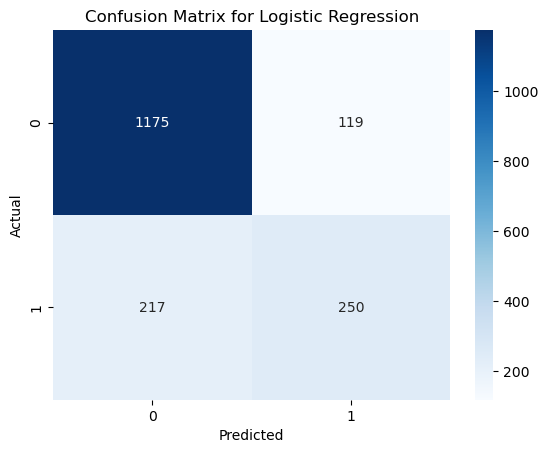


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1294
           1       0.68      0.54      0.60       467

    accuracy                           0.81      1761
   macro avg       0.76      0.72      0.74      1761
weighted avg       0.80      0.81      0.80      1761



In [33]:
#Confusion Matrix and Classification Reports
best_model_name = results_df.index[0]
best_model = models[best_model_name]

print(f"\nDetailed Evaluation for {best_model_name}:")

# Predictions for the best model
y_pred_best = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
report = classification_report(y_test, y_pred_best)
print(f"\nClassification Report for {best_model_name}:\n", report)

In [34]:
# Hyperparameter Tuning and Interpretation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [35]:
# Hyperparameter Tuning (Random Forest Example)
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Setup RandomizedSearchCV
rf_grid = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    scoring='roc_auc',
    cv=5,
    n_iter=10,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
rf_grid.fit(X_train, y_train)

# Display best parameters
print("Best Parameters:", rf_grid.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}


In [36]:
# Evaluate Optimized Model
# Predict with optimized model
y_pred_tuned = rf_grid.predict(X_test)

# Evaluate metrics
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, rf_grid.predict_proba(X_test)[:, 1])

print(f"Tuned Model Accuracy: {accuracy_tuned:.4f}")
print(f"Tuned Model ROC-AUC: {roc_auc_tuned:.4f}")


Tuned Model Accuracy: 0.8007
Tuned Model ROC-AUC: 0.8423


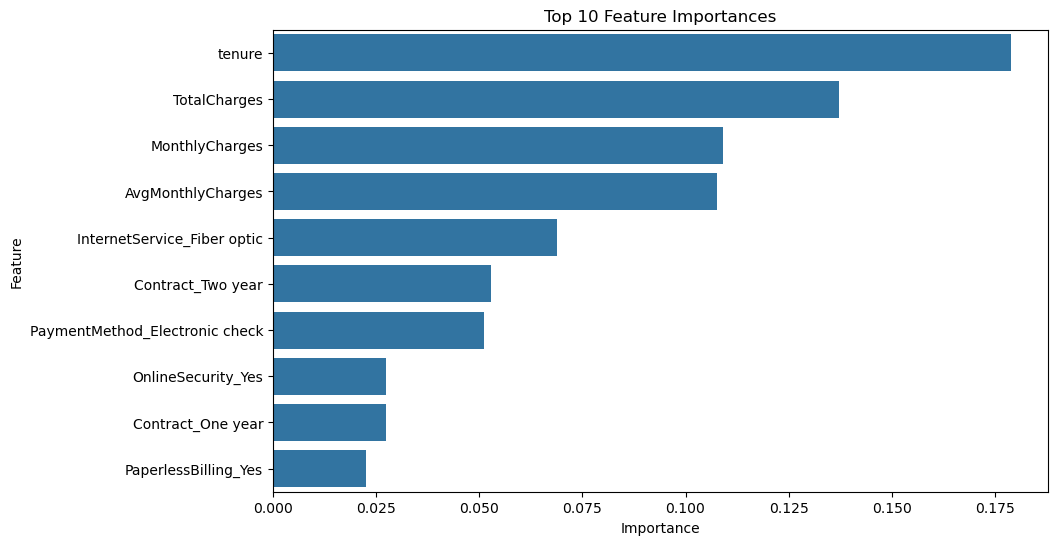

In [37]:
# Feature Importance Interpretation
# Extract feature importance
importances = rf_grid.best_estimator_.feature_importances_
features = X.columns

# Feature importance dataframe
feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

# Plotting top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances[:10], y=feat_importances.index[:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Model Interpretation (Insights)

# Contract length strongly impacts churn (month-to-month customers more likely to churn).

# High monthly charges significantly correlate with churn.

# Senior citizens and those without online security features are more prone to churn.

In [39]:
# Basic Deployment Using Streamlit
# Install Streamlit
!pip install streamlit


In [41]:
import os

# Create the 'models' directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save the optimized Random Forest model
joblib.dump(rf_grid.best_estimator_, '../models/best_model.pkl')

# Save the scaler
joblib.dump(scaler, '../models/scaler.pkl')


['../models/scaler.pkl']

In [43]:
pip install joblib